In [28]:
#Import libralies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
#%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from scipy.stats.contingency import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-ticks')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [29]:
#Import the dataset
dataset = pd.read_csv('file:///C:/Users/User/Desktop/ml-regression project/SEATTLE_HOUSE_SALES.csv')


In [3]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
dataset.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
data=dataset.drop(['id','date','zipcode','waterfront','grade','view','condition','sqft_living15','floors','bathrooms','yr_renovated','sqft_lot','sqft_lot15','yr_built','bedrooms'],axis=1)


In [7]:
#data=dataset.drop(['id','date','lat','zipcode','yr_renovated','bedrooms','sqft_living','yr_built','sqft_lot','floors','sqft_lot15','condition','view','long','grade','waterfront'],axis=1)


In [8]:
data.isnull().any()


price            False
sqft_living      False
sqft_above       False
sqft_basement    False
lat              False
long             False
dtype: bool

In [9]:
data.describe()


,price,sqft_living,sqft_above,sqft_basement,lat,long
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,1788.390691,291.509045,47.560053,-122.213896
std,3.671272e+05,918.440897,828.090978,442.575043,0.138564,0.140828
min,7.500000e+04,290.000000,290.000000,0.000000,47.155900,-122.519000
25%,3.219500e+05,1427.000000,1190.000000,0.000000,47.471000,-122.328000
50%,4.500000e+05,1910.000000,1560.000000,0.000000,47.571800,-122.230000
75%,6.450000e+05,2550.000000,2210.000000,560.000000,47.678000,-122.125000
max,7.700000e+06,13540.000000,9410.000000,4820.000000,47.777600,-121.315000


In [10]:
X=data.iloc[:,-5:]
y=data.iloc[:,-6]

In [11]:
X

,sqft_living,sqft_above,sqft_basement,lat,long
0,1180,1180,0,47.5112,-122.257
1,2570,2170,400,47.7210,-122.319
2,770,770,0,47.7379,-122.233
3,1960,1050,910,47.5208,-122.393
4,1680,1680,0,47.6168,-122.045
...,...,...,...,...,...
21608,1530,1530,0,47.6993,-122.346
21609,2310,2310,0,47.5107,-122.362
21610,1020,1020,0,47.5944,-122.299
21611,1600,1600,0,47.5345,-122.069


In [12]:
y

0        221900
1        538000
2        180000
3        604000
4        510000
          ...  
21608    360000
21609    400000
21610    402101
21611    400000
21612    325000
Name: price, Length: 21613, dtype: int64

In [13]:
y

0        221900
1        538000
2        180000
3        604000
4        510000
          ...  
21608    360000
21609    400000
21610    402101
21611    400000
21612    325000
Name: price, Length: 21613, dtype: int64

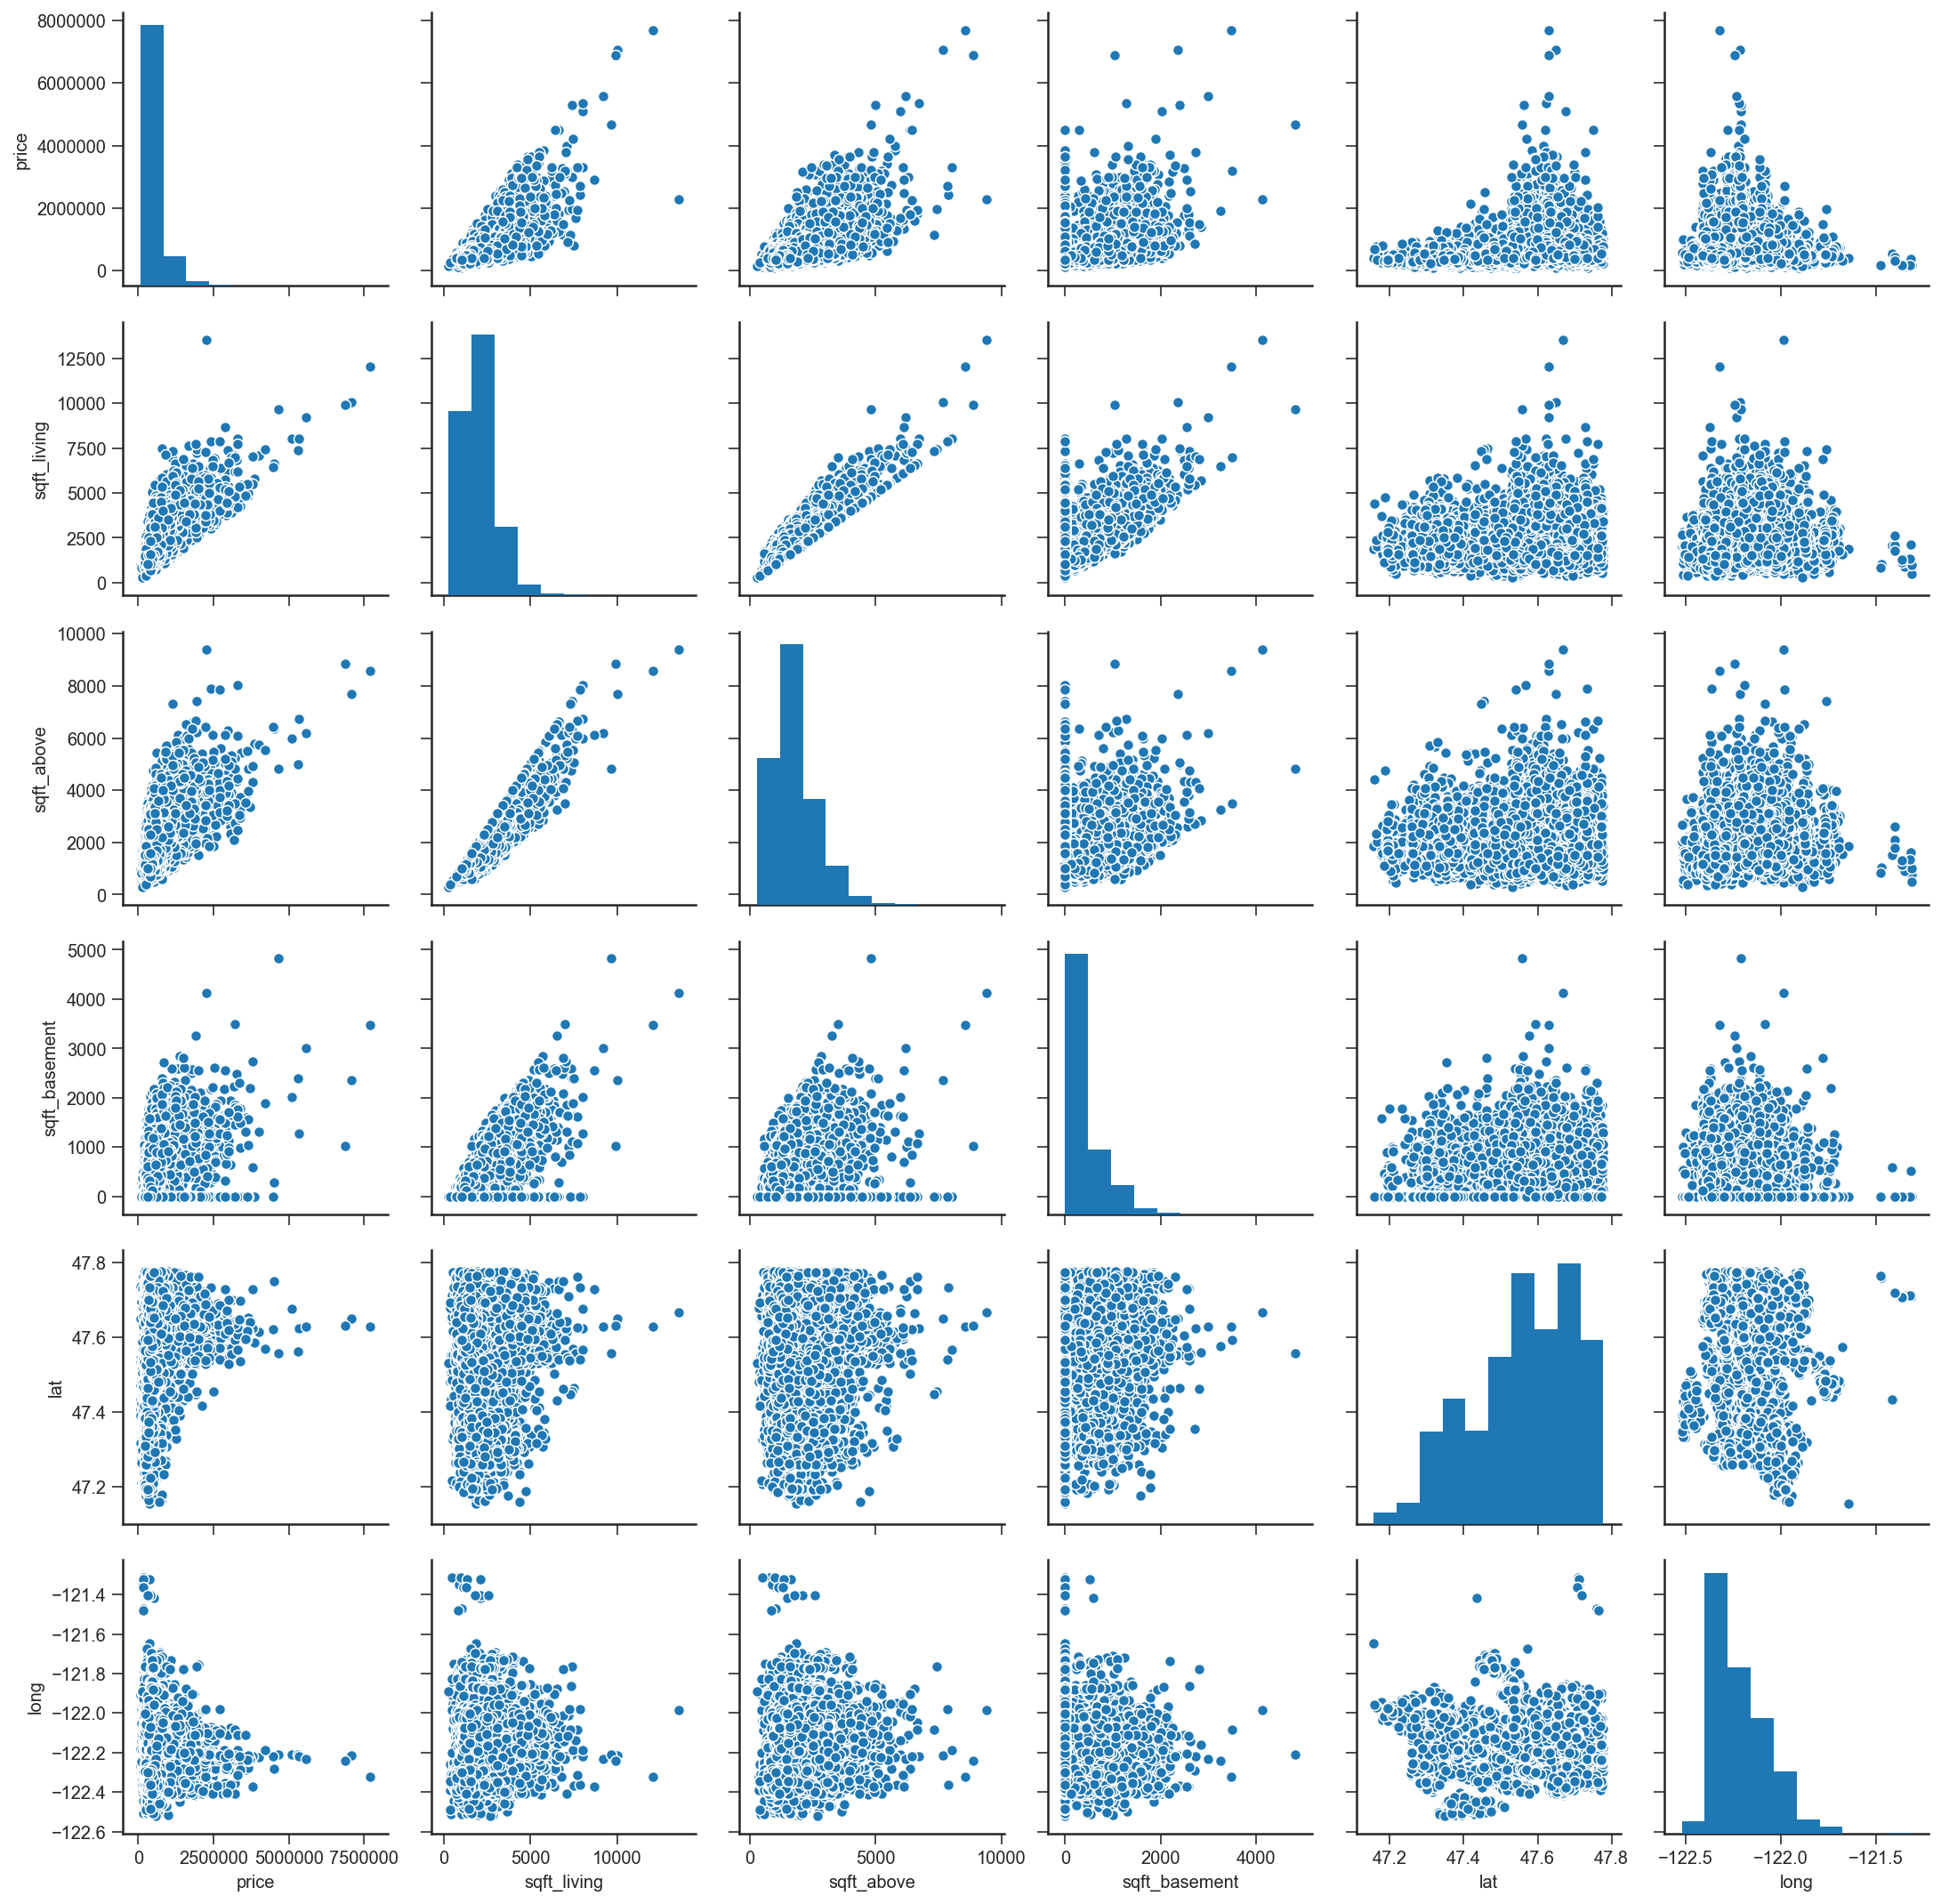

In [14]:

sns.pairplot(data)

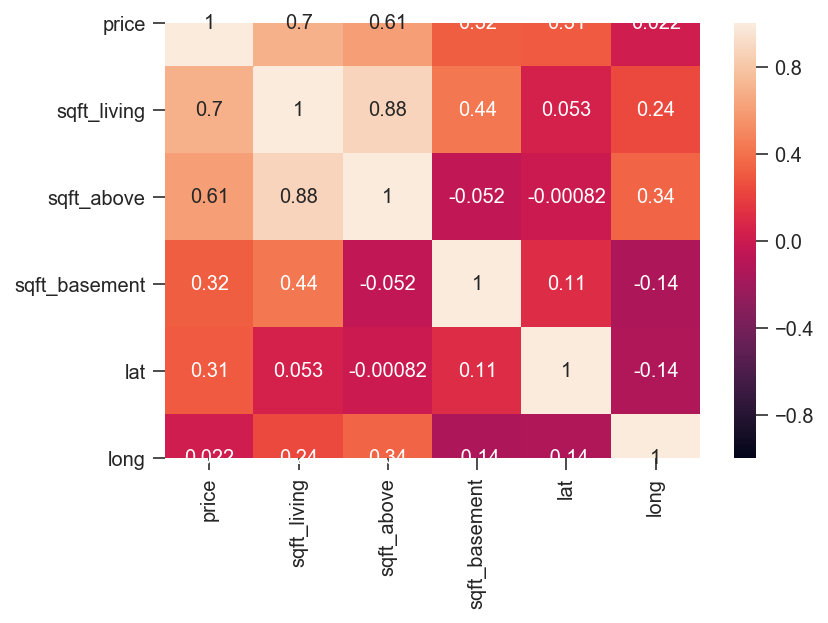

In [15]:
sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True)

In [16]:
#Splitting data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=0)

In [17]:
#preprocessing(scaling) 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.transform(X_test)


In [19]:
#import libs
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [20]:
model = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [22]:
print("r2 / variance : ", grid.best_score_)

r2 / variance :  0.58018434317337


In [23]:
print("Residual sum of squares: %.2f"
              % np.mean((grid.predict(X_test) - y_test) ** 2))

Residual sum of squares: 58650532803.95


In [24]:
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [25]:
grid.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': False}

In [26]:
#Prediction
lin_reg = LinearRegression()
lin_reg.fit(X_train_sc,y_train)
y_pred = lin_reg.predict(X_test_sc)

In [27]:
#MSE
mse = mean_squared_error(y_test,y_pred)
mse


58636881965.51163

In [28]:
#RMSE
rmse = sqrt(mse)
rmse

242150.53575309642

In [29]:
#accuracy
r2score = lin_reg.score(X_test_sc, y_test)
r2score 

0.5729037048169802

In [30]:
#K fold corss validation
accuracies = cross_val_score(lin_reg, X,y, cv=4)
print(accuracies)


[0.56125794 0.57453984 0.58589298 0.59430053]


In [31]:
accuracies.mean()


0.5789978218804919

In [32]:
accuracies.std()

0.012412625759866666

In [33]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.fit_transform(X_test)

In [34]:

import statsmodels.api as sm
X2_train=sm.add_constant(X_train_scaled)
X2_test=sm.add_constant(X_test_scaled)
ols=sm.OLS(y_train,X_train)
lr=ols.fit()
lr.params

sqft_living         182.581059
sqft_above           78.361162
sqft_basement       104.219897
lat              551302.887292
long             214615.158376
dtype: float64

In [36]:
#after FEATURE ELIMINATION
print(lr.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.856
Model:                            OLS   Adj. R-squared (uncentered):              0.856
Method:                 Least Squares   F-statistic:                          2.241e+04
Date:                Tue, 17 Mar 2020   Prob (F-statistic):                        0.00
Time:                        23:25:49   Log-Likelihood:                     -2.0939e+05
No. Observations:               15129   AIC:                                  4.188e+05
Df Residuals:                   15125   BIC:                                  4.188e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

# svr

In [38]:
X=data.iloc[:,-5:]
y=data.iloc[:,-6]

In [39]:
#splitting the data Training and Test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.30, random_state=0)

In [40]:
#Feature Scaling
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [41]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [42]:
#Using Poly kernel with SVM
reg = SVR(kernel ='poly', degree=1)
reg.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=1, epsilon=0.1,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [43]:
y_pred = reg.predict(X_test)

In [44]:
score = reg.score(X_test,y_test)
mse = mean_squared_error(y_test,y_pred)
rmse = sqrt(mse)
score
mse
rmse

378277.8595681719

In [45]:
score

-0.042261706243362784

In [46]:
rmse

378277.8595681719

In [47]:
#K fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(reg, X,y, cv=4)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

In [48]:
accuracies

array([0.44583901, 0.45785742, 0.45981962, 0.4664524 ])

In [49]:
accuracies.mean()

0.45749211373642523

# random forest

In [17]:
X=data.iloc[:,-5:]
y=data.iloc[:,-6]

In [18]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [19]:
#splitting the data Training and Test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.30, random_state=0)

In [20]:
#Feature Scaling
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [30]:
estimator = RandomForestRegressor()
para_grids = {
            "n_estimators" : [10,50,100],
            "max_features" : ["auto", "log2", "sqrt"],
            "bootstrap"    : [True, False]
        }
grid = GridSearchCV(estimator,para_grids, cv=10)
grid.fit(X_train, y_train)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'bootstrap': [True, False],
  

In [31]:
#Using Random Forest Regressor
reg = RandomForestRegressor()
reg.fit(X_train_sc, y_train)
y_pred = reg.predict(X_test_sc)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [32]:
#K fold corss validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(reg, X,y, cv=4)

In [33]:
print(accuracies)

[0.80026048 0.81913823 0.74533311 0.78685837]


In [34]:
accuracies.mean()

0.7878975471128575

In [35]:
score = reg.score(X_test,y_test)
mse = mean_squared_error(y_test,y_pred)
rmse = sqrt(mse)
score
mse
rmse

163799.40583050906

In [36]:
score

-197.09199078987646

In [37]:
rmse

163799.40583050906

# KNN

In [92]:
X=data.iloc[:,-5:]
y=data.iloc[:,-6]

In [93]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [95]:
#Splitting datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [96]:
#grid search-best params

from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor()
parameters = [{'weights': ['uniform'], 
               'n_neighbors': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}]

grid = GridSearchCV(model,parameters, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': [5, 10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100],
                          'weights': ['uniform']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [97]:
grid.best_params_

{'n_neighbors': 10, 'weights': 'uniform'}

In [98]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [99]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       82000       0.00      0.00      0.00         1
       89000       0.00      0.00      0.00         1
       90000       0.00      0.00      0.00         1
       92000       0.00      0.00      0.00         1
       95000       0.00      0.00      0.00         0
      100000       0.00      0.00      0.00         2
      102500       0.00      0.00      0.00         1
      105000       0.00      0.00      0.00         2
      106000       0.00      0.00      0.00         0
      107000       0.00      0.00      0.00         1
      110000       0.00      0.00      0.00         2
      110700       0.00      0.00      0.00         0
      111300       0.00      0.00      0.00         0
      112000       0.00      0.00      0.00         0
      115000       0.00      0.00      0.00         1
      118000       0.00      0.00      0.00         0
      119500       0.00      0.00      0.00         1
      119900       0.00    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [100]:
from sklearn.model_selection import cross_val_score

In [101]:

scores = []
for i in range(1,5):
    clf = KNeighborsClassifier(n_neighbors=i)
    scores.append(cross_val_score(clf,X,y,cv=4).mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The mi

In [102]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
#RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test,y_pred)
rmse = sqrt(mse)
score = lin_reg.score(X_test_sc, y_test)

Text(0.5, 1.0, 'Finding optimal K')

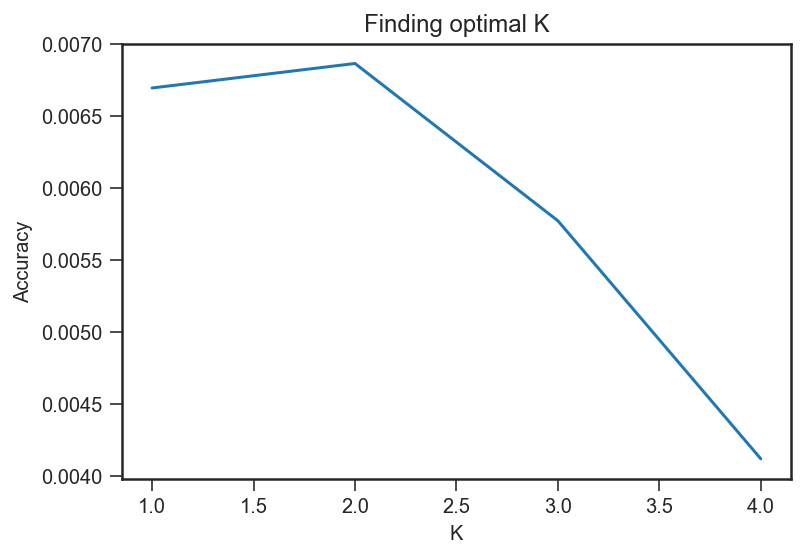

In [104]:
import matplotlib.pyplot as plt
plt.plot(range(1,5),scores)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Finding optimal K")

# ADABOOST

In [107]:
X=data.iloc[:,-5:]
y=data.iloc[:,-6]

In [108]:
import scipy.stats   
import scipy.special 

In [109]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [110]:
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=0,train_size=.5)

In [111]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
rf = RandomForestClassifier(n_estimators=50,random_state=0)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.009160729157027852

In [113]:
ada = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=100,random_state=0)
ada.fit(X_train,y_train)
ada.score(X_test,y_test)

0.007772739890811511

In [114]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,classification_report

In [115]:
accuracy=accuracy_score(y_test,y_test)
accuracy

1.0

In [116]:
print(classification_report(y_test,y_test))

              precision    recall  f1-score   support

       80000       1.00      1.00      1.00         1
       82000       1.00      1.00      1.00         1
       82500       1.00      1.00      1.00         1
       83000       1.00      1.00      1.00         1
       86500       1.00      1.00      1.00         1
       89000       1.00      1.00      1.00         1
       90000       1.00      1.00      1.00         1
       92000       1.00      1.00      1.00         1
       95000       1.00      1.00      1.00         1
       99000       1.00      1.00      1.00         1
      100000       1.00      1.00      1.00         4
      102500       1.00      1.00      1.00         1
      105000       1.00      1.00      1.00         2
      105500       1.00      1.00      1.00         1
      106000       1.00      1.00      1.00         1
      107000       1.00      1.00      1.00         1
      109500       1.00      1.00      1.00         1
      110000       1.00    